In [1]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import geopandas as gpd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import json
from sklearn.cluster import KMeans


from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode 
from geopandas.tools import reverse_geocode  

%matplotlib inline

In [2]:
df = pd.read_csv('AB_NYC_2019_Clean_Midtown.csv')
df

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
1,232,59855,One bedroom Apt. in NYC,288031,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,0
2,245,61509,"Quiet, clean midtown apt w. elevato",23619,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,140
3,373,110739,"Very Central, Nomad/Chelsea Loft Studio",568568,Manhattan,Midtown,40.74503,-73.98876,Entire home/apt,169,18,54,98
4,382,114969,"Manhattan Studio, Perfect Location",582598,Manhattan,Midtown,40.75579,-73.96699,Entire home/apt,145,6,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,48746,36416632,Nice studio 4 people next to Times Square.,266294029,Manhattan,Midtown,40.75354,-73.98377,Entire home/apt,245,2,0,79
1541,48748,36417250,US Open special 2-bed luxury condo,133288905,Manhattan,Midtown,40.75174,-73.97343,Entire home/apt,369,4,0,4
1542,48755,36419291,Wyndham Midtown 45 New York City 1 Bedroom Deluxe,273812306,Manhattan,Midtown,40.75288,-73.97269,Private room,380,3,0,3
1543,48830,36450318,"LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE",151831356,Manhattan,Midtown,40.74607,-73.98599,Entire home/apt,199,1,0,14


In [3]:
df.count()

Unnamed: 0             1545
id                     1545
name                   1545
host_id                1545
neighbourhood_group    1545
neighbourhood          1545
latitude               1545
longitude              1545
room_type              1545
price                  1545
minimum_nights         1545
number_of_reviews      1545
availability_365       1545
dtype: int64

In [4]:
df.isnull().sum()

Unnamed: 0             0
id                     0
name                   0
host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
availability_365       0
dtype: int64

In [5]:
df.corr()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
Unnamed: 0,1.000000,0.998974,0.621447,-0.034507,-0.052908,0.098810,-0.077998,-0.254037,0.177378
id,0.998974,1.000000,0.619090,-0.035782,-0.052356,0.102109,-0.077003,-0.253632,0.176645
host_id,0.621447,0.619090,1.000000,-0.080457,-0.050588,0.140044,-0.124316,-0.114506,0.170553
latitude,-0.034507,-0.035782,-0.080457,1.000000,0.255687,0.064640,0.029559,-0.087397,0.020679
longitude,-0.052908,-0.052356,-0.050588,0.255687,1.000000,0.033600,0.063822,0.011997,0.023792
price,0.098810,0.102109,0.140044,0.064640,0.033600,1.000000,-0.023381,-0.117927,0.183927
minimum_nights,-0.077998,-0.077003,-0.124316,0.029559,0.063822,-0.023381,1.000000,-0.101051,0.245644
number_of_reviews,-0.254037,-0.253632,-0.114506,-0.087397,0.011997,-0.117927,-0.101051,1.000000,-0.014980
availability_365,0.177378,0.176645,0.170553,0.020679,0.023792,0.183927,0.245644,-0.014980,1.000000


Text(0.5, 1, 'Heat Map of Correlation')

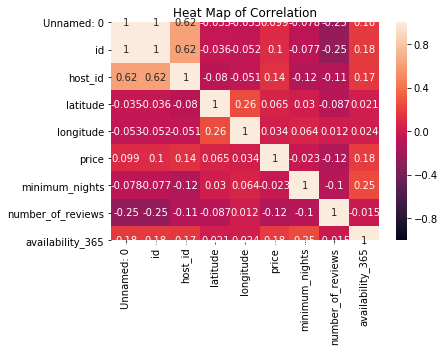

In [6]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, annot=True)
plt.title('Heat Map of Correlation')

Text(0.5, 1, 'Minimum Number of Nights vs Review Count')

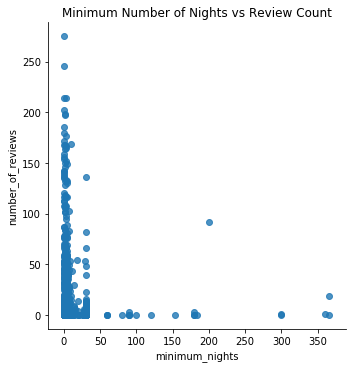

In [7]:
sns.lmplot(x='minimum_nights', y='number_of_reviews', data=df, fit_reg = False)
plt.title('Minimum Number of Nights vs Review Count')

In [8]:
bins = [-1, 73, 146, 219, 292, 365]

# Create names for the four groups
group_names = ['Low', 'Medium', 'Average', 'High', 'Always']

#make new column with letter grades
df['Availability'] = pd.cut(df['availability_365'], bins, labels=group_names)

In [9]:
df

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,Availability
0,1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,Always
1,232,59855,One bedroom Apt. in NYC,288031,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,0,Low
2,245,61509,"Quiet, clean midtown apt w. elevato",23619,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,140,Medium
3,373,110739,"Very Central, Nomad/Chelsea Loft Studio",568568,Manhattan,Midtown,40.74503,-73.98876,Entire home/apt,169,18,54,98,Medium
4,382,114969,"Manhattan Studio, Perfect Location",582598,Manhattan,Midtown,40.75579,-73.96699,Entire home/apt,145,6,39,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,48746,36416632,Nice studio 4 people next to Times Square.,266294029,Manhattan,Midtown,40.75354,-73.98377,Entire home/apt,245,2,0,79,Medium
1541,48748,36417250,US Open special 2-bed luxury condo,133288905,Manhattan,Midtown,40.75174,-73.97343,Entire home/apt,369,4,0,4,Low
1542,48755,36419291,Wyndham Midtown 45 New York City 1 Bedroom Deluxe,273812306,Manhattan,Midtown,40.75288,-73.97269,Private room,380,3,0,3,Low
1543,48830,36450318,"LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE",151831356,Manhattan,Midtown,40.74607,-73.98599,Entire home/apt,199,1,0,14,Low


Text(0.5, 1, 'Minimum Number of Nights vs Price by Availability')

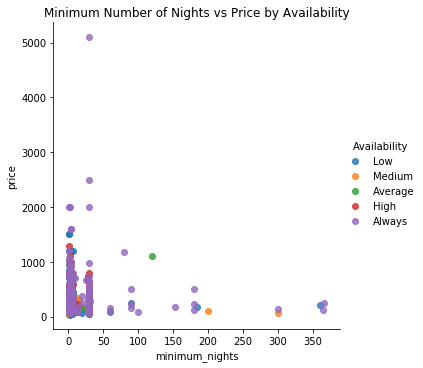

In [10]:
sns.lmplot(x='minimum_nights', y='price', data=df, fit_reg=False, hue='Availability')
plt.title('Minimum Number of Nights vs Price by Availability')

In [11]:
bins = [0, 200, 500, 1000, 2500]

# Create names for the four groups
group_names = ['Cheap', 'Middle', 'Expensive', 'Rich']

#make new column with letter grades
df['PriceRange'] = pd.cut(df['price'], bins, labels=group_names)

In [12]:
df

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,Availability,PriceRange
0,1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,Always,Middle
1,232,59855,One bedroom Apt. in NYC,288031,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,0,Low,Middle
2,245,61509,"Quiet, clean midtown apt w. elevato",23619,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,140,Medium,Cheap
3,373,110739,"Very Central, Nomad/Chelsea Loft Studio",568568,Manhattan,Midtown,40.74503,-73.98876,Entire home/apt,169,18,54,98,Medium,Cheap
4,382,114969,"Manhattan Studio, Perfect Location",582598,Manhattan,Midtown,40.75579,-73.96699,Entire home/apt,145,6,39,0,Low,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,48746,36416632,Nice studio 4 people next to Times Square.,266294029,Manhattan,Midtown,40.75354,-73.98377,Entire home/apt,245,2,0,79,Medium,Middle
1541,48748,36417250,US Open special 2-bed luxury condo,133288905,Manhattan,Midtown,40.75174,-73.97343,Entire home/apt,369,4,0,4,Low,Middle
1542,48755,36419291,Wyndham Midtown 45 New York City 1 Bedroom Deluxe,273812306,Manhattan,Midtown,40.75288,-73.97269,Private room,380,3,0,3,Low,Middle
1543,48830,36450318,"LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE",151831356,Manhattan,Midtown,40.74607,-73.98599,Entire home/apt,199,1,0,14,Low,Cheap


Text(0.5, 1.0, 'Minimum Number of Nights vs Price by Price Range')

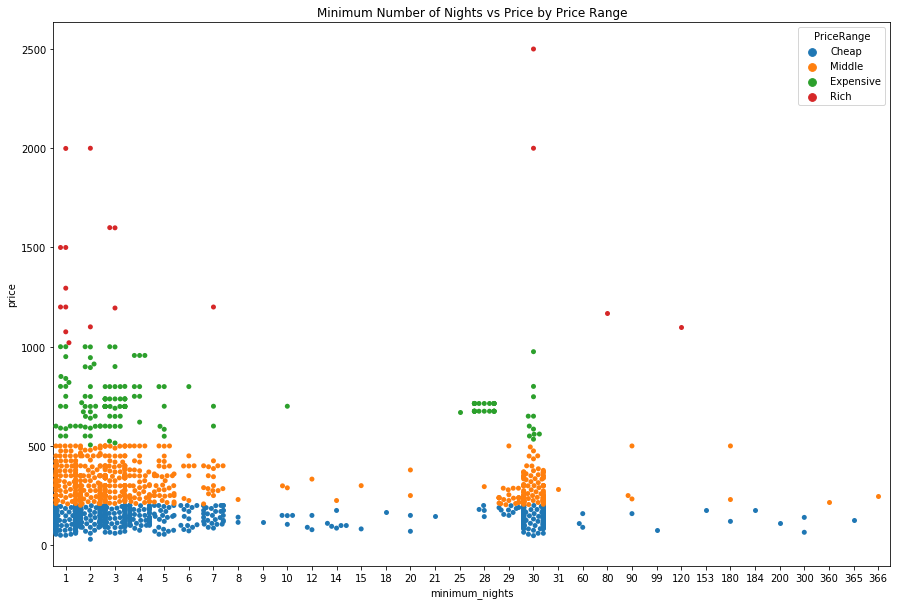

In [13]:
plt.subplots(figsize=(15,10))
sns.swarmplot(x='minimum_nights', y='price', data=df, hue = 'PriceRange')
plt.title('Minimum Number of Nights vs Price by Price Range')

Text(0.5, 1.0, 'Room Type vs Price')

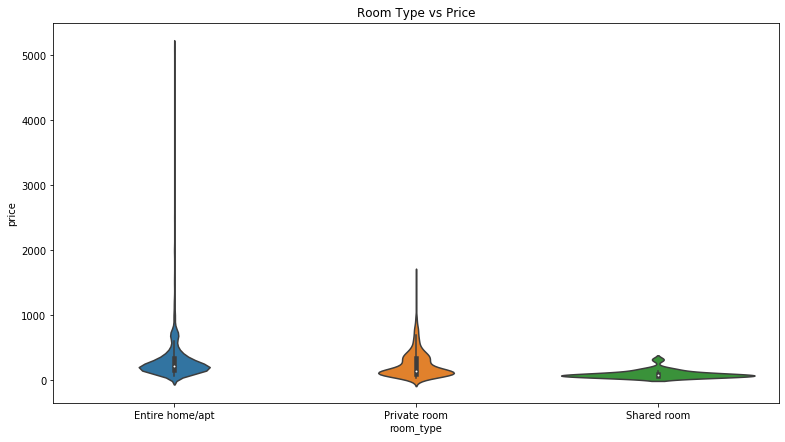

In [14]:
plt.subplots(figsize=(13,7))
sns.violinplot(x='room_type', y='price', data=df)
plt.title('Room Type vs Price')

In [15]:
df2 = df
df2

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,Availability,PriceRange
0,1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,Always,Middle
1,232,59855,One bedroom Apt. in NYC,288031,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,0,Low,Middle
2,245,61509,"Quiet, clean midtown apt w. elevato",23619,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,140,Medium,Cheap
3,373,110739,"Very Central, Nomad/Chelsea Loft Studio",568568,Manhattan,Midtown,40.74503,-73.98876,Entire home/apt,169,18,54,98,Medium,Cheap
4,382,114969,"Manhattan Studio, Perfect Location",582598,Manhattan,Midtown,40.75579,-73.96699,Entire home/apt,145,6,39,0,Low,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,48746,36416632,Nice studio 4 people next to Times Square.,266294029,Manhattan,Midtown,40.75354,-73.98377,Entire home/apt,245,2,0,79,Medium,Middle
1541,48748,36417250,US Open special 2-bed luxury condo,133288905,Manhattan,Midtown,40.75174,-73.97343,Entire home/apt,369,4,0,4,Low,Middle
1542,48755,36419291,Wyndham Midtown 45 New York City 1 Bedroom Deluxe,273812306,Manhattan,Midtown,40.75288,-73.97269,Private room,380,3,0,3,Low,Middle
1543,48830,36450318,"LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE",151831356,Manhattan,Midtown,40.74607,-73.98599,Entire home/apt,199,1,0,14,Low,Cheap


In [16]:
bins = [-1, 73, 146, 219, 292, 365]

# Create names for the four groups
group_names = [0, 1, 2, 3, 4]

#make new column with letter grades
df2['Available_num'] = pd.cut(df['availability_365'], bins, labels=group_names)

In [17]:
df2.head()

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,Availability,PriceRange,Available_num
0,1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,Always,Middle,4
1,232,59855,One bedroom Apt. in NYC,288031,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,0,Low,Middle,0
2,245,61509,"Quiet, clean midtown apt w. elevato",23619,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,140,Medium,Cheap,1
3,373,110739,"Very Central, Nomad/Chelsea Loft Studio",568568,Manhattan,Midtown,40.74503,-73.98876,Entire home/apt,169,18,54,98,Medium,Cheap,1
4,382,114969,"Manhattan Studio, Perfect Location",582598,Manhattan,Midtown,40.75579,-73.96699,Entire home/apt,145,6,39,0,Low,Cheap,0


In [18]:
df2.isnull().sum()

Unnamed: 0             0
id                     0
name                   0
host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
availability_365       0
Availability           0
PriceRange             1
Available_num          0
dtype: int64

In [19]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
df3 = df2.drop(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'Availability', 'PriceRange'], axis = 1)

In [21]:
df3.head()

,Unnamed: 0,price,minimum_nights,number_of_reviews,availability_365,Available_num
0,1,225,1,45,355,4
1,232,250,30,82,0,0
2,245,110,200,92,140,1
3,373,169,18,54,98,1
4,382,145,6,39,0,0


In [22]:
df3.drop(['Unnamed: 0'], inplace = True, axis = 1)

In [23]:
df3

,price,minimum_nights,number_of_reviews,availability_365,Available_num
0,225,1,45,355,4
1,250,30,82,0,0
2,110,200,92,140,1
3,169,18,54,98,1
4,145,6,39,0,0
...,...,...,...,...,...
1540,245,2,0,79,1
1541,369,4,0,4,0
1542,380,3,0,3,0
1543,199,1,0,14,0


In [24]:
df3.drop(['price'], inplace = True, axis = 1)
df3

,minimum_nights,number_of_reviews,availability_365,Available_num
0,1,45,355,4
1,30,82,0,0
2,200,92,140,1
3,18,54,98,1
4,6,39,0,0
...,...,...,...,...
1540,2,0,79,1
1541,4,0,4,0
1542,3,0,3,0
1543,1,0,14,0


In [25]:
df3.columns

Index(['minimum_nights', 'number_of_reviews', 'availability_365',
       'Available_num'],
      dtype='object')

In [74]:
X = df3.head(200)
X.count()

minimum_nights       200
number_of_reviews    200
availability_365     200
Available_num        200
dtype: int64

In [75]:
df2 = df2.head(200)

In [76]:
df2.count()

Unnamed: 0             200
id                     200
name                   200
host_id                200
neighbourhood_group    200
neighbourhood          200
latitude               200
longitude              200
room_type              200
price                  200
minimum_nights         200
number_of_reviews      200
availability_365       200
Availability           200
PriceRange             200
Available_num          200
dtype: int64

In [77]:
lm.fit(X, df2['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 267.03248065129645


In [79]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 4


In [80]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,minimum_nights,-0.413530
1,number_of_reviews,-0.619896
2,availability_365,0.973687
3,Available_num,-93.607869


In [81]:
lm.predict(X)[0:5]

array([209.95094505, 203.79510271, 170.00436052, 227.92798516,
       240.37535174])

In [82]:
lm.score(X, df2['price'])

0.047498602325537376

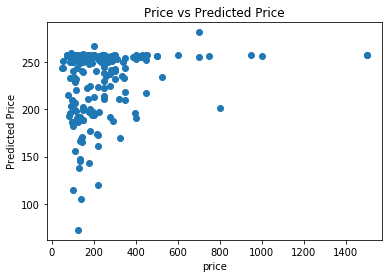

In [95]:
plt.scatter(df2['price'], lm.predict(X))
plt.xlabel("price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [84]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, df2.price, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(134, 4)
(66, 4)
(134,)
(66,)


In [85]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [87]:
print('Estimated Y intercept coefficient:', lm.intercept_)

Estimated Y intercept coefficient: 258.0272024774223


In [92]:
lm.predict(X)[0:200]

array([196.66192975, 213.77338281, 155.55968358, 222.6727483 ,
       240.1348674 , 255.30057804, 199.68462538, 194.47620453,
        72.33643997, 240.98097748, 229.11982132, 145.39186837,
       210.47432632, 170.84244129, 224.98723719, 169.28084407,
       181.83124054, 202.34557878, 240.47954027, 203.65129871,
       251.3552795 , 244.0986315 , 251.3552795 , 211.31013045,
       255.30057804, 249.02432297, 250.11813984, 244.20615111,
       120.24970407, 198.94892293, 165.04275946, 231.56570394,
       206.57488194, 237.10362648, 192.43701732, 213.11753573,
       256.04532043, 243.88935852, 209.88621073, 160.90627924,
       243.02089714, 143.34191213, 245.00629015, 190.9519347 ,
       256.48232105, 200.93080498, 257.26399454, 241.59910198,
       173.82254909, 249.66267367, 256.48232105, 137.59761607,
       257.9524594 , 197.36889226, 250.32828226, 257.64559851,
       233.08358541, 255.66371646, 255.35597469, 256.11918263,
       196.24779629, 257.64559851, 255.82638513, 256.08

In [93]:
print(lm.score(X_train, Y_train))
print(lm.score(X_test, Y_test))

0.03977761206496455
0.04088852030667023
